q1

51
0
100
0
105
256


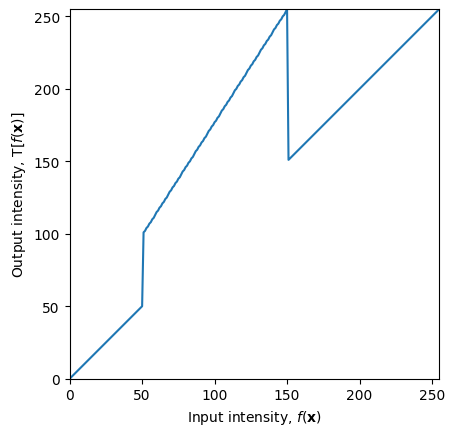

<function destroyAllWindows>

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0, 50, 51).astype('uint8')
print(len(t1))
t2 = np.linspace(50, 100, 0).astype('uint8')
print(len(t2))
t3 = np.linspace(101, 255, 100).astype('uint8')
print(len(t3)) 
t4 = np.linspace(255, 150, 0).astype('uint8')
print(len(t4)) 
t5 = np.linspace(151, 255, 105).astype('uint8')
print(len(t5)) 

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

original_image = cv.imread("emma.jpg", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", original_image) 
cv.waitKey(0)
transformed = cv.LUT(original_image, transform)
cv.imshow("Image", transformed)
cv.waitKey(0)
cv.destroyAllWindows




q2 a

256


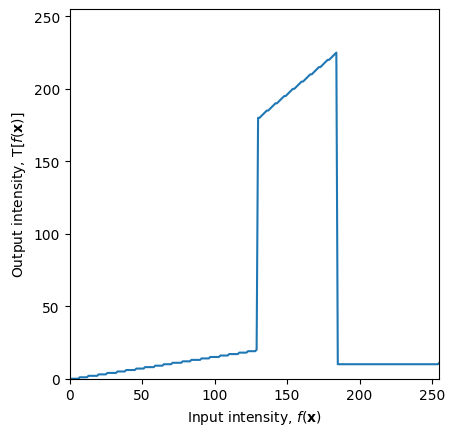

In [4]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0, 20, 130).astype("uint8")
t2 = np.linspace(180, 225, 55).astype("uint8")
t3 = np.linspace(10, 11, 71).astype("uint8")


transform = np.concatenate((t1, t2), axis=0).astype('uint8') 
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

original_image = cv.imread("BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", original_image) 
cv.waitKey(0)
transformed = cv.LUT(original_image, transform)
cv.imshow("Image", transformed)
cv.waitKey(0)
cv.destroyAllWindows


q2 b

256


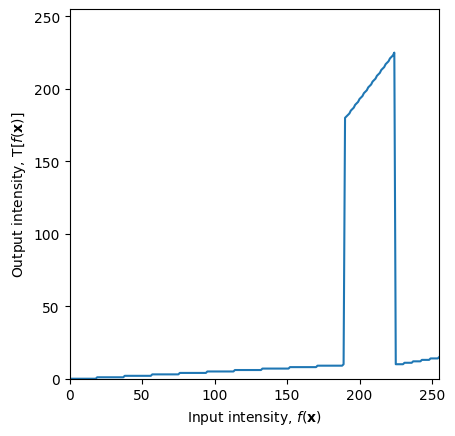

<function destroyAllWindows>

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0, 10, 190).astype('uint8')
t2 = np.linspace(180, 225, 35).astype('uint8')
t3 = np.linspace(10, 15, 31).astype('uint8')


transform = np.concatenate((t1, t2), axis=0).astype('uint8') 
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input intensity, $f(\mathbf{x})$')
ax.set_ylabel('Output intensity, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()

original_image = cv.imread("BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", original_image) 
cv.waitKey(0)
transformed = cv.LUT(original_image, transform)
cv.imshow("Image", transformed)
cv.waitKey(0)
cv.destroyAllWindows


q3

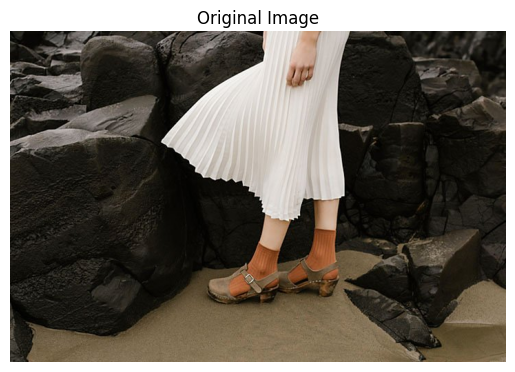

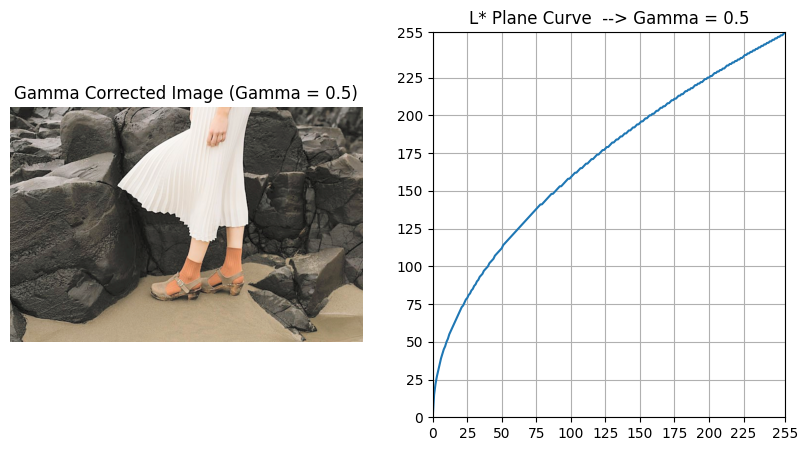

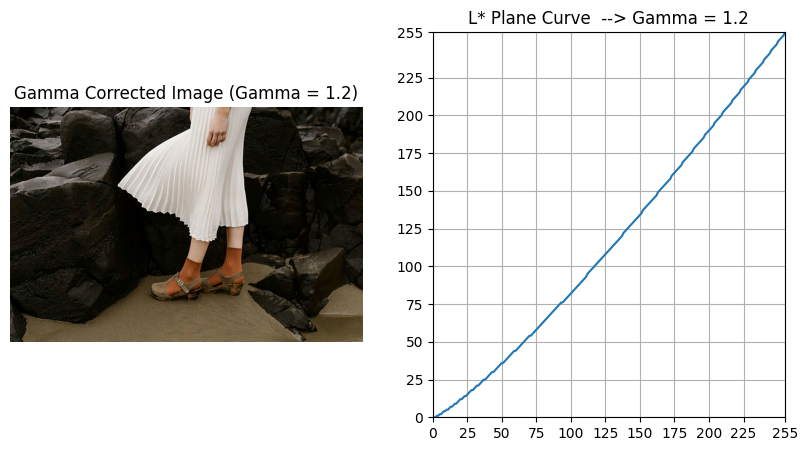

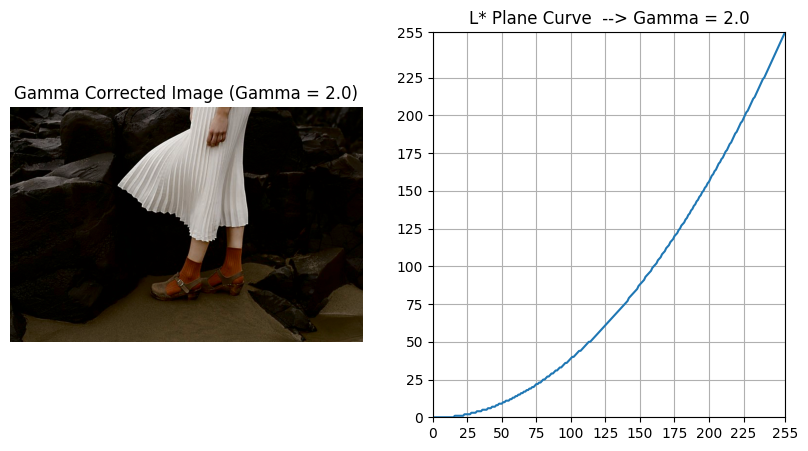

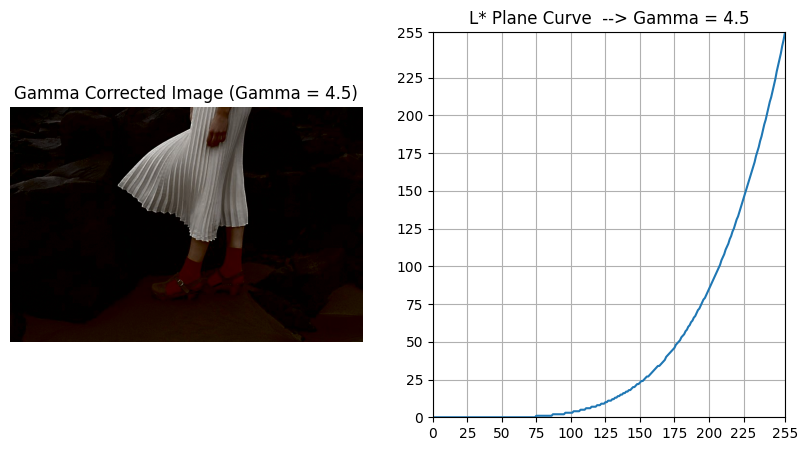

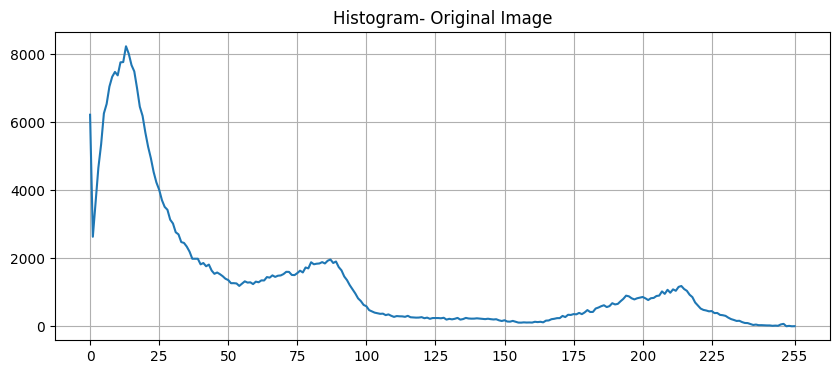

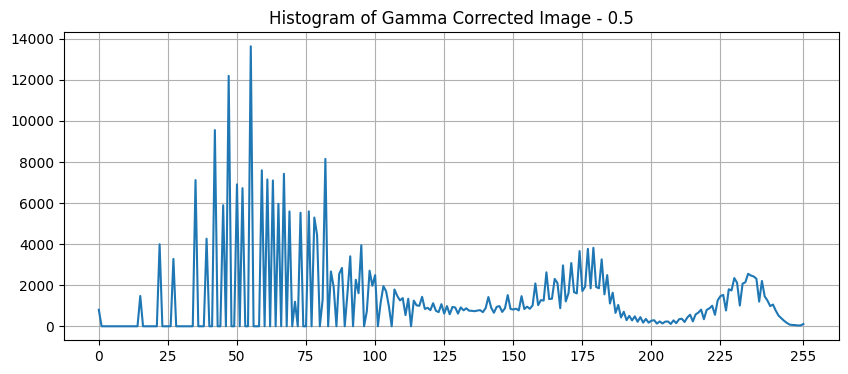

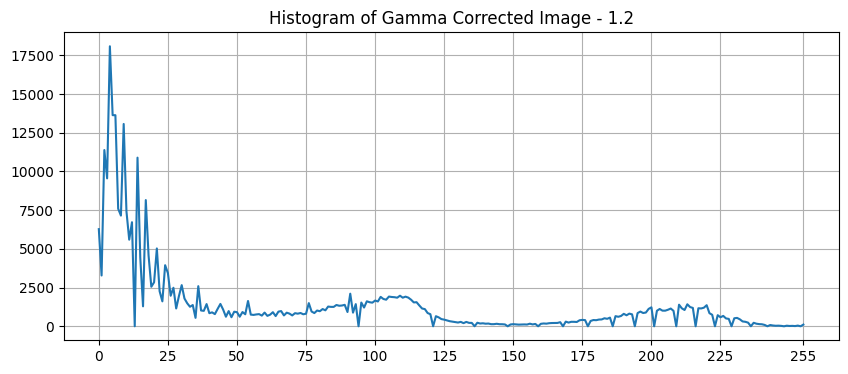

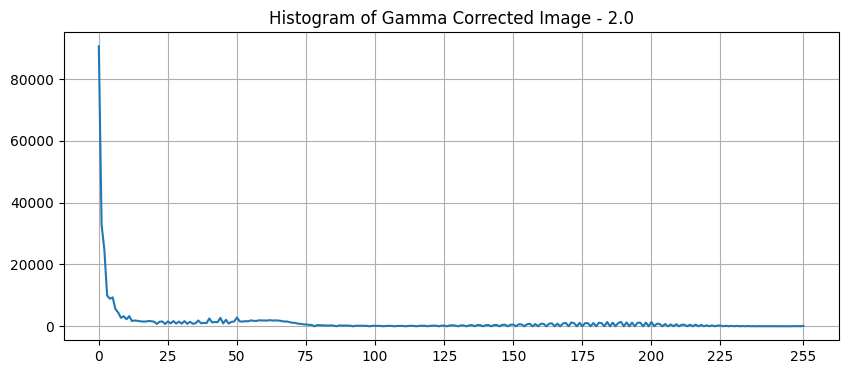

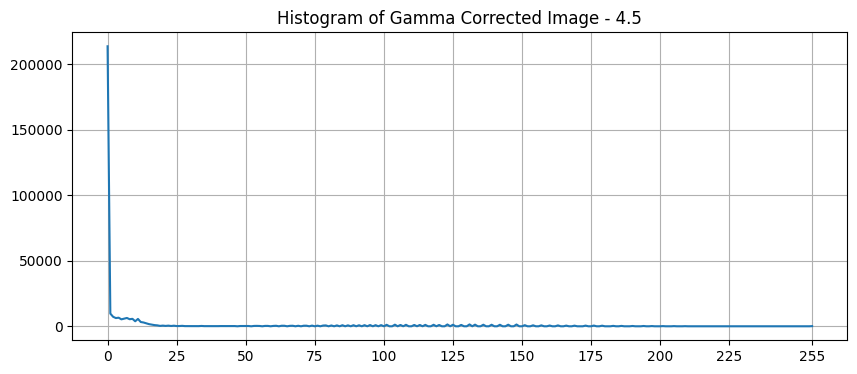

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)

#convert the image color to L*a*b color space
lab = cv.cvtColor(im, cv.COLOR_BGR2LAB) 

#ploting the original Image
fig, ax = plt.subplots()
ax.imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax.set_title("Original Image")
ax.axis('off')

L, a, b = cv.split(lab) 

#Gamma values
gamma = [0.5, 1.2, 2.0, 4.5]

histograms = []

for g in gamma:
    
    lookUpTable = np.array([(p/255)**(g)*255 for p in range(0, 256)]).astype(np.uint8)
    Lgamma = cv.LUT(L, lookUpTable)
    lab_gamma = cv.merge([Lgamma, a, b])
    histograms.append(cv.calcHist([lab_gamma],[0],None,[256],[0,256]))
    img = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)
            
    label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

    fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    ax[0].imshow(cv.cvtColor(img ,cv.COLOR_BGR2RGB))
    ax[0].axis('off')
    ax[0].set_title("Gamma Corrected Image (Gamma = " + str(g)+")")

    ax[1].plot(lookUpTable)
    ax[1].set_title("L* Plane Curve  --> Gamma = " + str(g))
    ax[1].grid("on")
    ax[1].set_xlim([0, 255])
    ax[1].set_ylim([0, 255])
    ax[1].set_xticks(label)
    ax[1].set_yticks(label)
    plt.show()

    histogram_of_original_image = cv.calcHist([im],[0],None,[256],[0,256])

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]
#Histogram of Original Image
fig,ax = plt.subplots(1,1,figsize = (10,4))
ax.plot(histogram_of_original_image)
ax.set_title("Histogram- Original Image")
ax.set_xticks(label)
ax.grid("on")


#Histogram of gamma corrected Images
for k in range(len(histograms)):
    hist_f = cv.calcHist([im], [0], None, [256], [0,256])
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.plot(histograms[k])
    ax.set_title("Histogram of Gamma Corrected Image - " + str(gamma[k]))
    ax.set_xticks(label)
    ax.grid('on')
plt.show()

q4

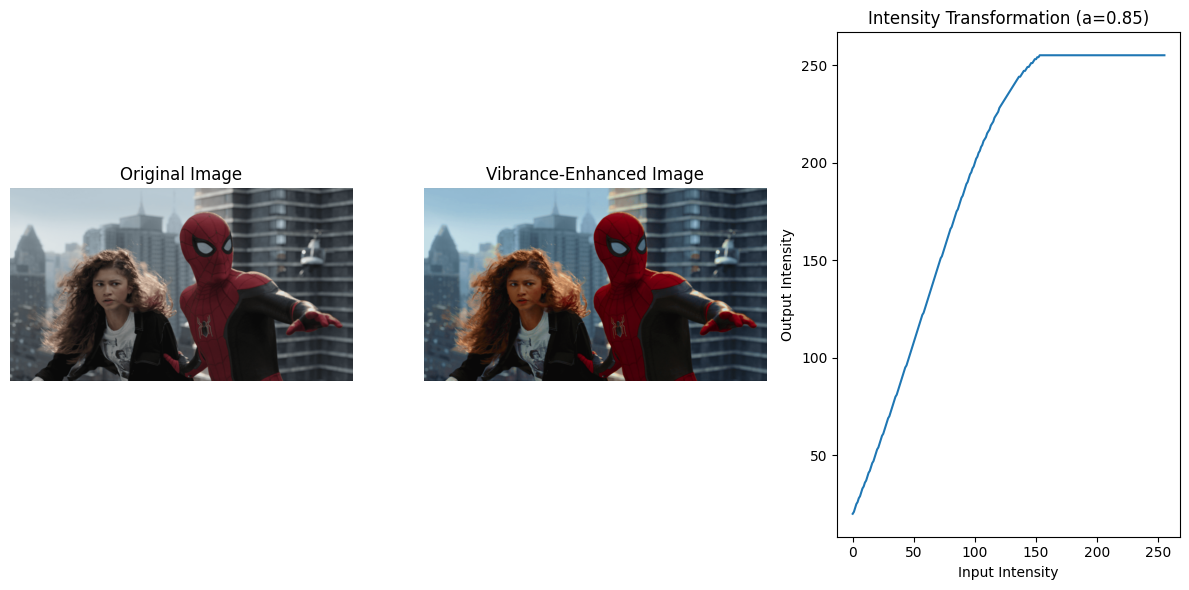

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('spider.png')

# Convert the image to the HSV color space
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value planes
hue, saturation, value = cv.split(image_hsv)

# Define the intensity transformation function
def transformation(x, a):
    sigma = 70.0
    power = -((x - 128.0) ** 2) / (2 * sigma ** 2)
    p = x + a * 128.0 * (np.exp(power))
    return np.minimum(p, 255.0).astype('uint8')


a = 0.85  
transformed_saturation = np.vectorize(transformation)(saturation, a)
enhanced_image_hsv = cv.merge([hue, transformed_saturation, value])

# Convert the enhanced image back to BGR color space
enhanced_image = cv.cvtColor(enhanced_image_hsv, cv.COLOR_HSV2BGR)

# Display the original image, vibrance-enhanced image, and the intensity transformation
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(131)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Vibrance-Enhanced Image
plt.subplot(132)
plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
plt.title('Vibrance-Enhanced Image')
plt.axis('off')

# Intensity Transformation
intensity_values = np.arange(256)
transformed_values = [transformation(x, a) for x in intensity_values]
plt.subplot(133)
plt.plot(intensity_values, transformed_values)
plt.title('Intensity Transformation (a=' + str(a) + ')')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.tight_layout()
plt.show()


q5

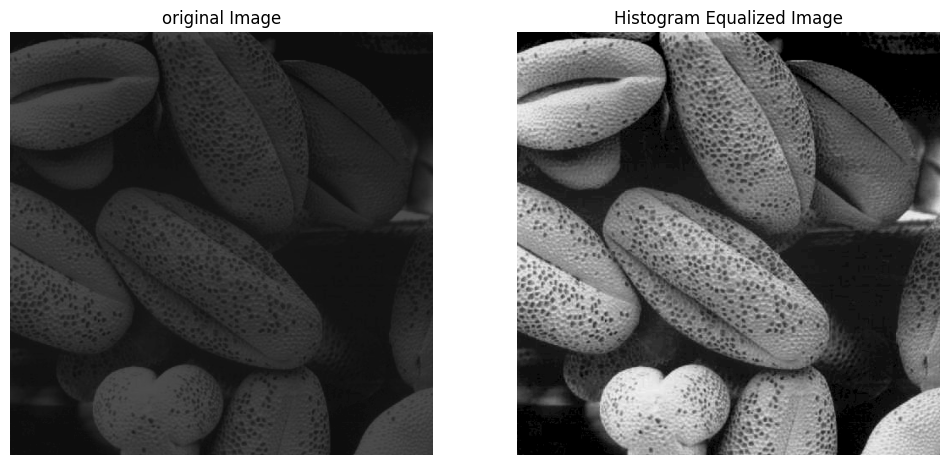

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


#making function to get histogram_equalization
def custom_histogram_equalization(image):
    imhis = image.copy()
    hist, _ = np.histogram(imhis.flatten(), bins=256, range=[0, 256])
    
    low = 0
    high = 255
    
    for i in range(0, 256):
        if hist[i] != 0:
            low = i
            break
    
    for i in range(255, -1, -1):
        if hist[i] != 0:
            high = i
            break
    
    # Perform histogram equalization using array operations
    imhis = np.round((imhis - low) * ((255 - 0) / (high - low)))
    imhis = np.clip(imhis, 0, 255)  # Clip values to ensure they are within [0, 255]
    
    return imhis.astype(np.uint8)  # Convert back to uint8 data type

im = cv.imread("shells.tif", cv.IMREAD_COLOR)

# Apply custom histogram equalization
equalized_im = custom_histogram_equalization(im)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original histogram
original_hist, _ = np.histogram(im.flatten(), bins=256, range=[0, 256])
axes[0].set_title("Original Histogram")
axes[0].set_xticks(label)
axes[0].plot(original_hist)
axes[0].grid(True)
axes[0].set_xlim([0, 255])

# Equalized histogram
equalized_hist, _ = np.histogram(equalized_im.flatten(), bins=256, range=[0, 256])
axes[1].set_title("Equalized Histogram")
axes[1].set_xticks(label)
axes[1].plot(equalized_hist)
axes[1].grid(True)
axes[1].set_xlim([0, 255])


fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_title("original Image",)
ax[0].imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax[0].axis("off")

ax[1].set_title("Histogram Equalized Image",)
ax[1].imshow(cv.cvtColor(equalized_im ,cv.COLOR_BGR2RGB))
ax[1].axis("off")


plt.show()

q6

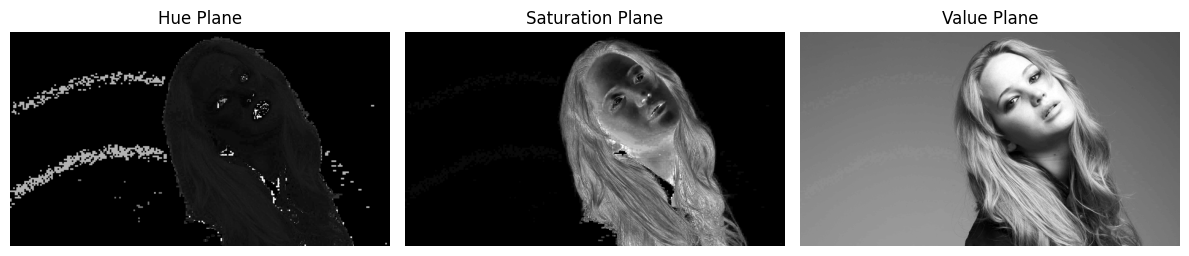

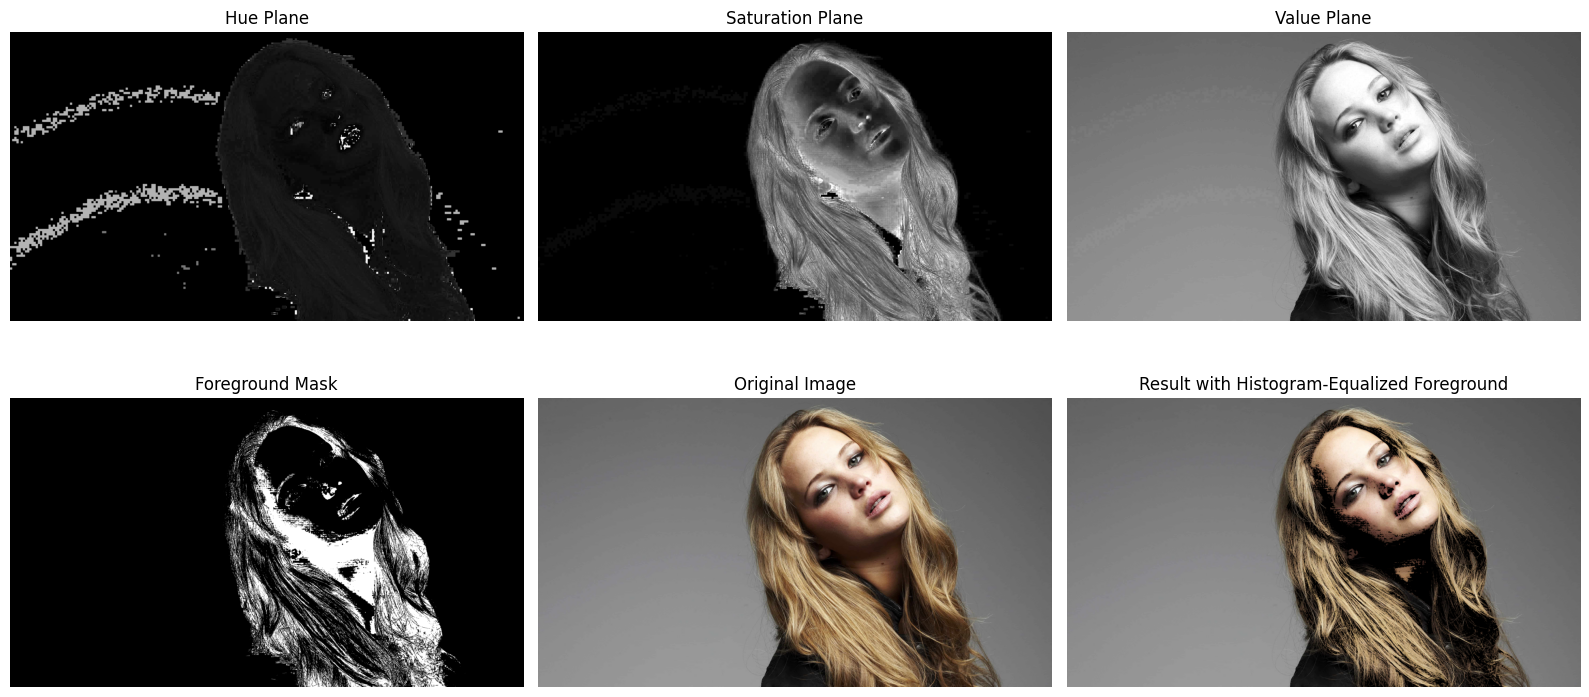

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('jeniffer.jpg')
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the  image into hue, saturation, and value planes
hue, saturation, value = cv.split(image_hsv)

# Display the hue, saturation, and value planes in grayscale
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.tight_layout()
plt.show()


# using saturation plane 
threshold_value = 128 
_, mask = cv.threshold(saturation, threshold_value, 255, cv.THRESH_BINARY)
foreground = cv.bitwise_and(image, image, mask=mask)

# Compute the histogram of the foreground
hist_foreground = cv.calcHist([foreground], [0], mask, [256], [0, 256])
# Compute the cumulative sum of the histogram
cumulative_hist = np.cumsum(hist_foreground)

# Histogram equalization for the foreground
eq_hist_values = ((cumulative_hist - cumulative_hist.min()) / (mask.sum() - 1) * 255).astype(np.uint8)
foreground_equalized = eq_hist_values[foreground]

# Extract the background
background = cv.bitwise_and(image, image, mask=cv.bitwise_not(mask))
result_image = cv.add(background, foreground_equalized)


plt.figure(figsize=(16, 8))

plt.subplot(231)
plt.imshow(hue, cmap='gray')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(232)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(233)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.subplot(234)
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(235)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(236)
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.title('Result with Histogram-Equalized Foreground')
plt.axis('off')

plt.tight_layout()
plt.show()


q7 a

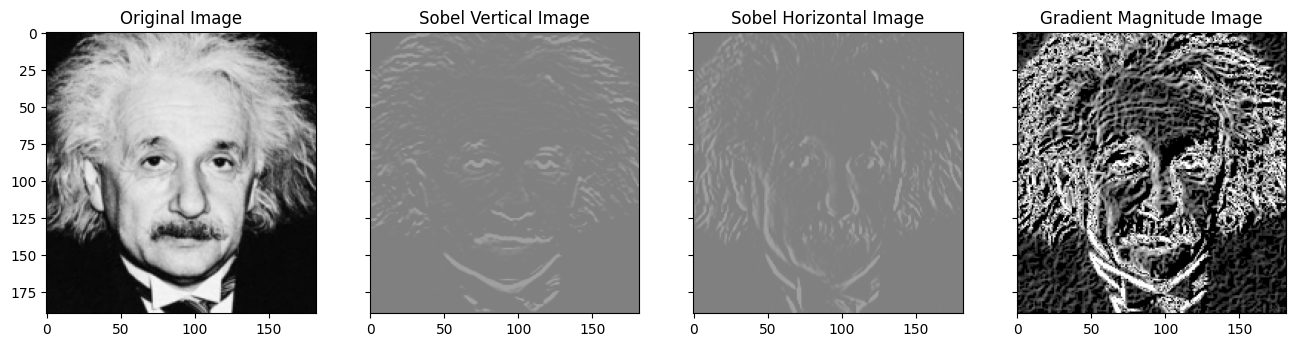

In [9]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread("einstein.png",cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define Sobel kernels
sobel_v = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float32')
sobel_h = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float32')

# Apply Sobel filters
imv = cv.filter2D(im, -1, sobel_v)
imh = cv.filter2D(im, -1, sobel_h)

# Compute gradient magnitude
grad_mag = np.sqrt(imv*2 + imh*2)

# Create subplots for visualization
fig, axes = plt.subplots(1, 4, sharex='all', sharey='all', figsize=(16, 16))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')

axes[1].imshow(imv, cmap='gray', vmin=-1020, vmax=1020)
axes[1].set_title('Sobel Vertical Image')

axes[2].imshow(imh, cmap='gray', vmin=-1020, vmax=1020)
axes[2].set_title('Sobel Horizontal Image')

axes[3].imshow(grad_mag, cmap='gray')
axes[3].set_title('Gradient Magnitude Image')

sobel_h_kernel = np.array([1, 2, 1], dtype=np.float32)
sobel_v_kernel = np.array([1, 0, -1], dtype=np.float32)

# Apply Sobel filtering using sepFilter2D
im1 = cv.sepFilter2D(im, -1, sobel_h_kernel, sobel_v_kernel)
im2 = cv.sepFilter2D(im, -1, sobel_v_kernel, sobel_h_kernel)

# Compute gradient magnitude
grad_mag = np.sqrt(imv*2 + imh*2)

q7 b  

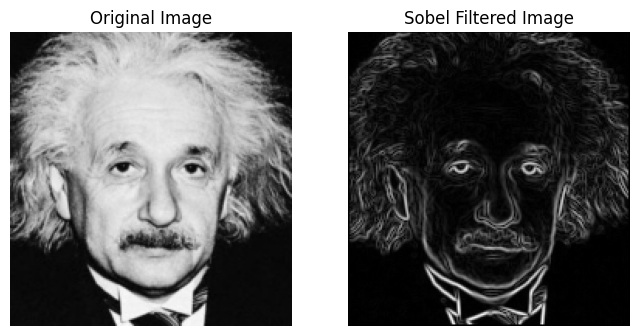

In [10]:
im_gg = np.zeros((im.shape[0],im.shape[1]),np.uint8)

for i in range(1,im.shape[0]-1):
    for j in range(1,im.shape[1]-1):
        f_xx = im[i-1, j-1]*(-1) + im[i-1, j]*(-2) + im[i-1, j+1]*(-1) + im[i+1, j-1]*1 + im[i+1, j]*2 + im[i+1, j+1]*1
        f_hh = im[i-1, j-1]*(-1) + im[i, j-1]*(-2) + im[i-1, j+1]*1 + im[i+1, j-1]*(-1) + im[i, j+1]*2 + im[i+1, j+1]*1
        grad = np.sqrt(f_xx**2 + f_hh**2)
        im_gg[i, j] = (grad / 1020) * 255 
        
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(im_gg, cmap = 'gray')
ax[1].set_title("Sobel Filtered Image")
ax[1].axis('off')

plt.show()



q7 c

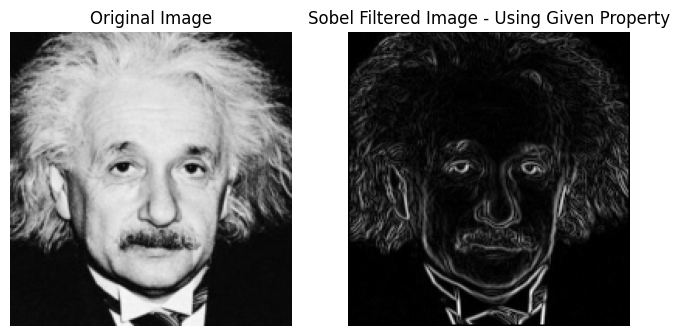

In [11]:
im_gd = np.zeros((im.shape[0],im.shape[1]),np.uint8)

mat = np.multiply((np.array([[1],[2],[1]], dtype=np.int32)),(np.array([1,0,-1], dtype=np.int32)))

sobel_hh = np.array([[0,0,0],[0,0,0],[0,0,0]])
for i in range(len(mat)):
    sobel_hh[i] = mat[i][::-1]

sobel_vv = sobel_hh.T

for i in range(1,im.shape[0]-1):
    for j in range(1,im.shape[1]-1):
        image = np.array([[im[i-1,j-1],im[i,j],im[i+1,j+1]], [im[i,j-1],im[i,j],im[i,j+1]], [im[i+1,j-1],im[i+1,j],im[i+1,j+1]]], dtype=np.float32)

        val_xx = 0
        val_yy = 0
        for k in range(3):
            for m in range(3):
                val_xx += image[k][m]*sobel_hh[k][m]
                val_yy += image[k][m]*sobel_vv[k][m]

        grad = np.sqrt(val_xx**2 + val_yy**2)
        im_gd[i, j] = (grad / 1020) * 255
                
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(im_gd, cmap = 'gray')
ax[1].set_title("Sobel Filtered Image - Using Given Property")
ax[1].axis('off')

plt.show()    



q8

SSD Nearest-Neighbor Zoom: 0.0001830374980420635
SSD Bilinear Interpolation: 0.00016429053061856538


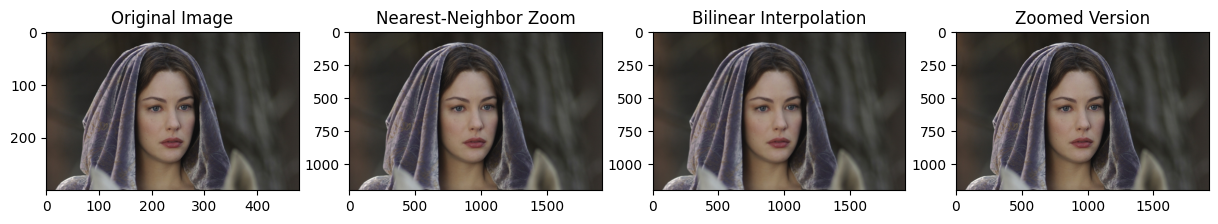

SSD Nearest-Neighbor Zoom: 0.0012108853093757068
SSD Bilinear Interpolation: 0.0012195573249169796


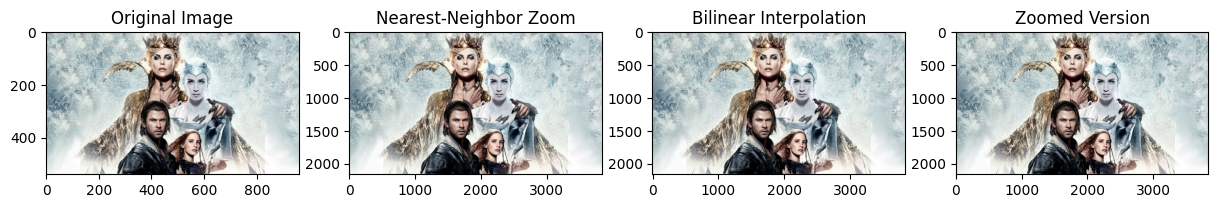

SSD Nearest-Neighbor Zoom: 0.00043005217469442824
SSD Bilinear Interpolation: 0.00043928369146882653


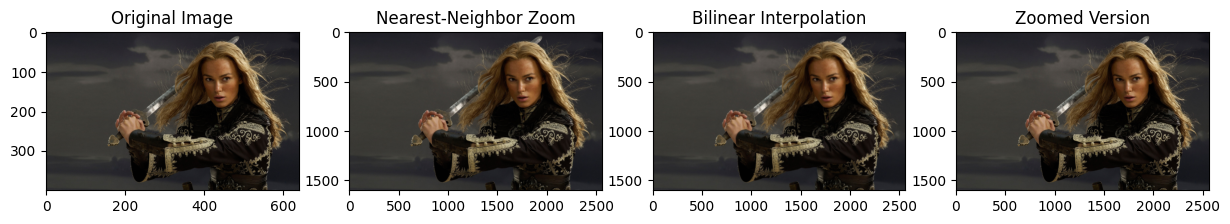

In [12]:
# List of filenames for original and zoomed out images
originals = [ "im02small.png",  "im04small.png", "im07small.png"]
zoomed_outs = [ "im02.png","im04.png","im07.png" ]

# Function to perform zoom using nearest-neighbor interpolation
def zoom_nearest_neighbour(scale, image):
    rows = int(scale*image.shape[0])
    columns = int(scale*image.shape[1])
    
    zoomed = np.zeros((rows,columns,3),dtype = image.dtype)
    for i in range(rows):
        for j in range(columns):
            zoomed[i,j] = image[int(i/scale),int(j/scale)]
    return zoomed

# Function to perform zoom using bilinear interpolation
def zoom_bilinear_interpolation(scale, image):
    rows = int(scale*image.shape[0])
    columns = int(scale*image.shape[1])
    
    zoomed = cv.resize(image,(columns,rows),interpolation = cv.INTER_LINEAR)
    return zoomed

# Function to compute Sum of Squared Differences (SSD) between two images
def SSD(img1,img2):
    val = np.sum(((img1[:,:]-img2[:,:])**2)/(3*255**2))/(img1.shape[0]*img1.shape[1])
    return val

scale=4   

for i in range(3):

    # Load the original and zoomed out images
    img = cv.imread(originals[i])
    img1 = cv.imread(zoomed_outs[i])


    near_img = zoom_nearest_neighbour(scale, img)
    ssd = SSD(img1,near_img)
    print("SSD Nearest-Neighbor Zoom:",ssd)


    bilinear_img = zoom_bilinear_interpolation(scale, img)
    ssd = SSD(img1,bilinear_img)
    print("SSD Bilinear Interpolation:",ssd)


    fig, ax = plt.subplots(1,4, figsize=(15,10))
    ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].set_title("Original Image")
    ax[1].imshow(cv.cvtColor(near_img,cv.COLOR_BGR2RGB)), ax[1].set_title("Nearest-Neighbor Zoom")
    ax[2].imshow(cv.cvtColor(bilinear_img,cv.COLOR_BGR2RGB)), ax[2].set_title("Bilinear Interpolation")
    ax[3].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB)), ax[3].set_title("Zoomed Version")
    plt.show()


q9 a

In [ ]:
im = cv.imread("flower.jpg",cv.IMREAD_COLOR) #getting the image

fig, ax = plt.subplots(1, 4, figsize=(18, 6))

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")


mask = np.zeros(im.shape[:2], np.uint8) 
#taking mask as original size of image
#to select rectangle area
rect = (0, 90, 800, 500)
fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)

# mask-0 --> Definite background
# mask-1 --> Definite forground
# mask-2 --> Probable background
# mask-3 --> Probable forground

cv.grabCut(im, mask, rect, bgdModel, fgdModel, 6, cv.GC_INIT_WITH_RECT)

#forground mask
mask1 = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
foreground_image = im*mask1[:, :, np.newaxis]

#background mask
mask2 = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
background_image = im*mask2[:, :, np.newaxis]



#after the segmantation
ax[1].imshow(mask1, cmap = "gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB))
ax[3].set_title("Background")
ax[3].axis("off")

plt.show()



q9 b

In [ ]:
# Apply Gaussian blur to the background image
im_blurred = cv.GaussianBlur(background_image, (15, 15), 0)

# Combine the blurred background and foreground images
im_enhanced = cv.addWeighted(im_blurred, 0.6, foreground_image, 0.8, 0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(cv.cvtColor(im_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title('Enhanced Image')

for a in ax:
    a.axis('off')

plt.show()




q9 c Why is the background just beyond the edge of the flower quite dark in the enhanced image?
In the improved image, the darkening effect observed in the background beyond the flower's boundaries is a consequence of applying Gaussian blur to that background area. This blurring operation reduces pixel intensities by averaging the values of neighboring pixels. Consequently, the pixels in the blurred background become a blend of the original, darker background regions, as well as potentially some portions of the flower's edges. This results in a gradual transition between the sharp foreground (the flower) and the blurred background. Due to the pixel averaging process, the background adjacent to the flower may appear darker in comparison to the original image. This effect becomes more pronounced when the background initially contains darker regions, as they blend with neighboring areas during the blurring process.
